In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [37]:
df_ROS=pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:3]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


In [38]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [46]:
df_ROS['입원일자']=df_ROS['입원일자'].astype(str)

In [47]:
df_ROS['입원일자_date']=pd.to_datetime(df_ROS['입원일자'])

In [48]:
df_ROS['입원일자_date'][:10]

0   2019-07-13
1   2019-07-15
2   2019-07-29
3   2019-07-31
4   2019-09-03
5   2019-09-05
6   2019-06-22
7   2019-03-30
8   2019-12-03
9   2019-12-10
Name: 입원일자_date, dtype: datetime64[ns]

In [50]:
df_ROS['퇴원일자']=df_ROS['퇴원일자'].astype(str)
df_ROS['퇴원일자_date']=pd.to_datetime(df_ROS['퇴원일자'])

In [51]:
df_ROS['퇴원일자_date']

0      2019-07-16
1      2019-07-16
2      2019-08-01
3      2019-08-03
4      2019-09-07
          ...    
1889   2017-04-08
1890   2017-04-29
1891   2017-04-12
1892   2017-04-11
1893   2017-04-13
Name: 퇴원일자_date, Length: 1894, dtype: datetime64[ns]

In [54]:
df_ROS['입원일자_year'] = df_ROS['입원일자_date'].dt.year

In [55]:
df_ROS['퇴원일자_year'] = df_ROS['퇴원일자_date'].dt.year

In [56]:
df_ROS['입원일자_week'] = df_ROS['입원일자_date'].dt.weekofyear

C:\Users\05-27\AppData\Local\Temp\ipykernel_6548\982215893.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['입원일자_week'] = df_ROS['입원일자_date'].dt.weekofyear


In [57]:
df_ROS['퇴원일자_week']= df_ROS['퇴원일자_date'].dt.weekofyear

C:\Users\05-27\AppData\Local\Temp\ipykernel_6548\3511578529.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['퇴원일자_week']= df_ROS['퇴원일자_date'].dt.weekofyear


In [58]:
df_ROS['입원일자_day']=df_ROS['입원일자_date'].dt.day_name()

In [60]:
df_ROS['퇴원일자_day']=df_ROS['퇴원일자_date'].dt.day_name()

<Axes: xlabel='입원일자_week', ylabel='퇴원일자_week'>

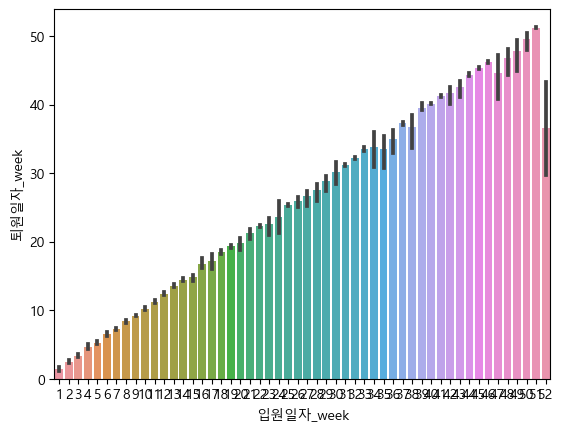

In [79]:
sns.barplot(data=df_ROS, x='입원일자_week',y='퇴원일자_week')

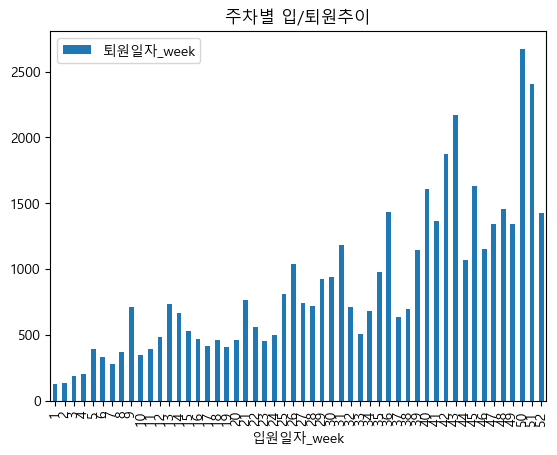

In [77]:
pd.pivot_table(data=df_ROS, index='입원일자_week', values='퇴원일자_week', aggfunc=sum).plot(kind='bar')
plt.title('주차별 입/퇴원추이')
plt.show()

분석결과 : 연말로 갈수록 환자수는 대략 증가세를 보인다.

In [70]:
df_ROS['입원일자_day']

0        Saturday
1          Monday
2          Monday
3       Wednesday
4         Tuesday
          ...    
1889       Friday
1890    Wednesday
1891       Monday
1892     Saturday
1893    Wednesday
Name: 입원일자_day, Length: 1894, dtype: object

In [71]:
df_ROS['퇴원일자_day']

0         Tuesday
1         Tuesday
2        Thursday
3        Saturday
4        Saturday
          ...    
1889     Saturday
1890     Saturday
1891    Wednesday
1892      Tuesday
1893     Thursday
Name: 퇴원일자_day, Length: 1894, dtype: object

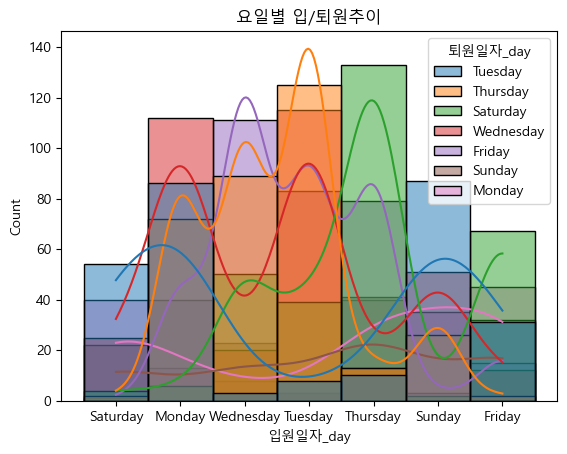

In [74]:
sns.histplot(data=df_ROS, x='입원일자_day', kde=True, hue='퇴원일자_day')
plt.title('요일별 입/퇴원추이')
plt.show()

분석결과 : 환자는 주말에 가까워 질수록 환자가 대략 줄어드는 것으로 보인다.